 <a name="top"> <h1>2.6. Gradient Boost</h1> <a>

<p>Payments Fraud Practice<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 


[1. Importación de librerias y funciones](#librerias) 


[2. Carga de datos](#datos) 

[3. Creación del modelo](#creacion) 

   
[4. Optimización del modelo](#optimizacion) 

   
[5. Predicción del modelo](#prediccion)

[6. Evaluación de las métricas del modelo](#metricas)

   - Matriz de confusión
   - Métricas: Accuracy, Recall, Precision, F1 y F2 score
   - Curva ROC

[7. Gradient Boost con SMOTE](#smote)

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 

El **método de Gradient Boost** consiste en entrenar de forma secuencial árboles de decisión, de manera que cada árbol trata de mejorar los errores de los árboles anteriores, es decir, **utiliza los errores para ir mejorando el modelo**. Una de las ventajas de este modelo es que **se comporta bien con grandes volúmenes de datos**. 

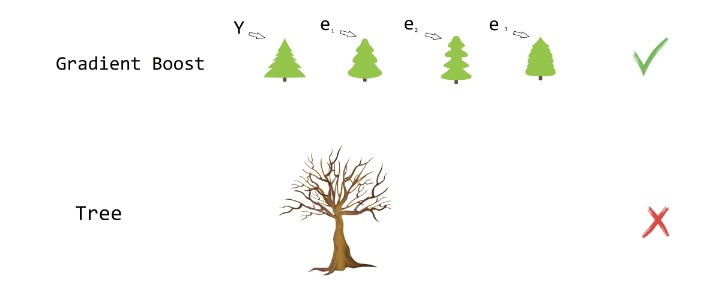

# <a name="librerias"> 1. Importación de librerias y funciones <a> 

In [17]:
# Import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

# Import sklearn metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, fbeta_score,roc_auc_score,plot_confusion_matrix,accuracy_score

# Import sklearn models and pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import HistGradientBoostingClassifier

Importamos las funciones a utilizar:

In [2]:
# Import the functions used in the notebook.

from aux_functions import load_model, save_model

Cargamos el pickle de preprocesado, para su posterior uso:

In [3]:
# Import the preprocessor.

preprocessor = load_model('../models/preprocessor.pickle')

# <a name="datos"> 2. Carga de datos <a> 

En primer lugar procederemos a cargar los datos de train y validación que insertaremos dentro del modelo para su optimización y predicción.

In [4]:
# Load the train dataset separated by other variables and target. Taking into account that the first column is the index.

x_train = pd.read_csv("../data/processed/x_train.csv",index_col=0 )
y_train = pd.read_csv("../data/processed/y_train.csv",index_col=0 )

# Load the validation dataset separated by other variables and target. Taking into account that the first column is the index.

x_val = pd.read_csv("../data/processed/x_val.csv",index_col=0 )
y_val = pd.read_csv("../data/processed/y_val.csv",index_col=0 )

# <a name="creacion"> 3. Creación del modelo <a> 

Para la utilización del modelo podemos utilizar el GradientBoostingClassifier o el HistGradientBoostingClassifier. En este caso, **utilizaremos el HistGradientBoostingClassifier, ya que es más rápido y eficiente** que el GradientBoostingClassifier puesto que paraleliza algunas partes del algoritmo, sin embargo, el GradientBoostingClassifier utiliza un único core. ç

Otra de las  ventajas del HistGradientBoostingClassifier es que no necesita un preprocesado de los datos, ya que es capaz de manejar datos categóricos, aunque en este caso lo hemos aplicado. 

Seleccionaremos parámetros como función de perdida para problemas de clasificación y aplicaremos una regularización l2

In [5]:
# Design the parameters.

random_state = 12345
learning_rate = 1
warm_start = True
loss = 'binary_crossentropy'
l2_regularization = 0.8


# Creation of a pipeline that applies a preprocess of the data and then Gradient Boosting

gradient_boosting = Pipeline([
    ('preprocessor', preprocessor),
    ('clasificador', HistGradientBoostingClassifier(loss=loss, learning_rate=learning_rate, warm_start=warm_start, random_state=random_state, l2_regularization=l2_regularization))
    
])

# <a name="optimizacion"> 4. Optimización del modelo <a> 

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [7]:
# Optimization of the gradient_boosting with the train set: input and target data. 

gradient_boosting.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknow',
                                                                                 strategy='constant',
                                                                                 verbose='deprecated')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'gender', 'device',
                                                   'zone', 'security_alert',
                                                   'nameDest', 'nameOrig',
                                                   'nameDest']),
                                        

Una vez optimizado el modelo Random Forest, con el set de train, procedemos a guardarlo en un pickle para que no tenga que volver a computarlo en un futuro, por si quisieramos usarlo.

In [8]:
# Save the backup of the gradient boosting optimziation as a pickle file.

save_model(gradient_boosting,'../models/Gradient_Boosting.pickle')

**Para evitar ejecutar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.**

In [10]:
# Load the Gradient boosting model already fitted in /models.

gradient_boosting = load_model('../models/Gradient_Boosting.pickle')

# <a name="prediccion"> 5. Predicción del modelo <a> 

Una vez realizada la optimización del modelo Gradient Boosting, procederemos a predecir el set de validación, sus valores y probabilidades. Para posteriormente obtener las métricas y observar cómo se comporta el modelo y su score.

In [11]:
# Predict target value of the validation set.

predictions = gradient_boosting.predict(x_val)

# Predict probabilities of target value for validation set.

predict_probabilities = gradient_boosting.predict_proba(x_val)

# <a name="metricas"> 6. Evaluación de las métricas del modelo <a> 

En este aparatado procederemos a análizar las métricas obtenidas. En el caso de que se quiera consultar la definición de cada una de ellas, se pueden encontrar en el documento `02_DummyModel`.

### 6.1. Matriz de confusión

En este aparatado procederemos a análizar las métricas obtenidas. En el caso de que se quiera consultar la definición de cada una de ellas, se pueden encontrar en el documento `02_DummyModel`.

Confusion matrix, without normalization
[[196320     74]
 [    44    170]]
Normalized confusion matrix
[[9.99623206e-01 3.76793588e-04]
 [2.05607477e-01 7.94392523e-01]]


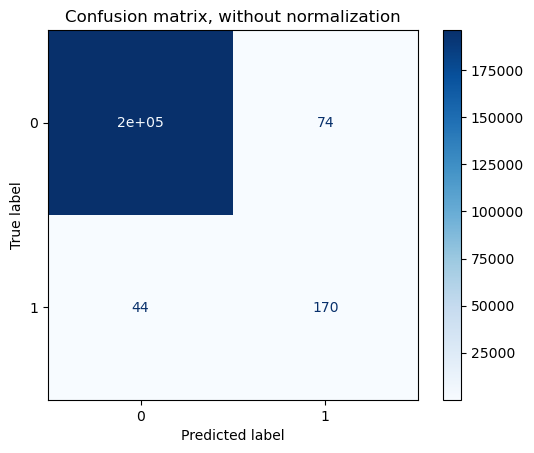

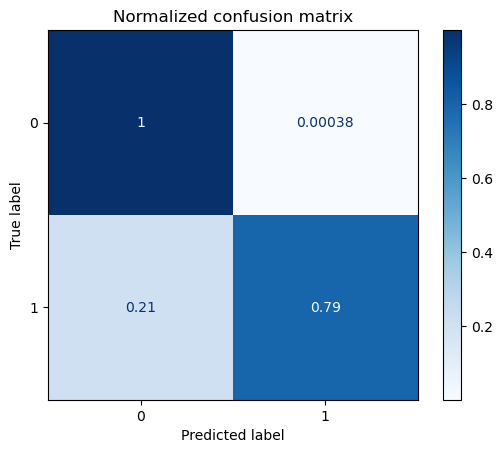

In [12]:
# List with the titles and parameters

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# Plot the confusion matrix

for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_boosting, x_val, y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

La matriz de confusión nos deja ver que el modelo se comporta bastante  bien puesto que **es capaz de predecir un 79% de la clase 1 que es el fraude**. A continuación se van a analizar las diferentes métricas. 

### 6.2. Métricas: Accuracy, Recall, Precision, F1  y F2 score

In [65]:
# Print the general metrics.

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196394
           1       0.70      0.79      0.74       214

    accuracy                           1.00    196608
   macro avg       0.85      0.90      0.87    196608
weighted avg       1.00      1.00      1.00    196608



In [18]:
# Print the F2 score.

print('F2 score is ' +str(fbeta_score(y_val, predictions, average='binary', beta=2)))

# Model Accuracy

print("Accuracy:",accuracy_score(y_val, predictions))

F2 score is 0.7727272727272727
Accuracy: 0.9993998209635416


Como ya comentamos en el documento `02_DummyModel`, nuestro dataset se caracteriza por tener un desbalanceo muy grande, es por ello que el análisis de las métricas de accuracy y precisión siempre van a ser muy elevadas, sin embargo, no reflejan la realidad predictora de nuestro modelo. Por lo que nos centraremos principalmente en las métricas F2-score y AUC .

- El modelo nos calcula un **Recall de 0.90**, valor alto,  lo que significa que el modelo llega a detectar correctamente aquellas transacciones que son fraude o no.

- El modelo nos calcula un **F2 score de 0.77**, un valor interesante, dado que se acerca por poco al mejor valor registrado hasta ahora en el modelo Random Forest aplicando SMOTE.

### 6.3. Curva ROC

Para evaluar nuestro modelo, la representaremos graficamente para deducir que tan bueno es el modelo.

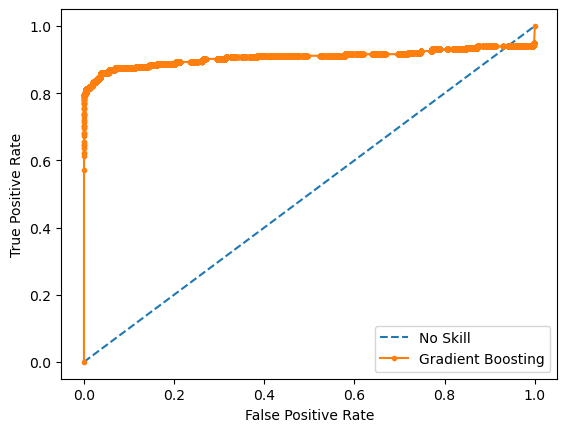

The Compute Area Under the Receiver Operating Characteristic is 0.9073522955333257


In [19]:
# Keep probabilities for the positive outcome only
yhat = predict_probabilities[:, 1]
# Calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat)
# Plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Gradient Boosting')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Show the plot
plt.show()

# Display the ROC AUC.

print('The Compute Area Under the Receiver Operating Characteristic is '+ str(roc_auc_score(y_val,yhat)))

La curva ROC nos muestra un resultado bueno pero realmente atípico. Esto se debe a que los datos están desbalanceados, por lo que no utilizaremos esta métrica para compararlo con los demás modelos. 

# <a name="smote"> 7. Gradient Boosting Classifier con SMOTE <a> 

Debido al desbalanceo de los datos se utilizará el método SMOTE para verificar si mejora el modelo.

### 7.1. Creación del modelo con SMOTE

Aplicamos el SMOTe en el preprocesado previo a aplicar el algoritmo.

In [70]:
# Design the parameters.

random_state = 12345
learning_rate = 1
warm_start = True
loss = 'binary_crossentropy'
l2_regularization = 0.8
sampling_strategy = 0.4
n_jobs = -1


# Creation of a pipeline that applies a preprocess of the data and then Random Forest

gradient_boosting_SMOTE = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=sampling_strategy, n_jobs=n_jobs)),
    ('clasificador', HistGradientBoostingClassifier(loss=loss, learning_rate=learning_rate, warm_start=warm_start, random_state=random_state, l2_regularization=l2_regularization))

])

### 7.2. Optimización del modelo con SMOTE

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [71]:
# Optimization of the gradient_boosting_SMOTE with the train set: input and target data. 

gradient_boosting_SMOTE.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknow',
                                                                                 strategy='constant',
                                                                                 verbose='deprecated')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'gender', 'device',
                                                   'zone', 'security_alert',
                                                   'nameDest', 'nameOrig',
                                                   'nameDest']),
                                        

In [72]:
# Save the backup of the XGB optimziation as a pickle file.

save_model(gradient_boosting_SMOTE,'../models/Gradient_Boosting_Classifier_SMOTE.pickle')

**Para evitar ejecutar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.**

In [20]:
# Load the Gradient_Boosting_Classifier_SMOTE model already fitted in /models.

gradient_boosting_SMOTE = load_model('../models/Gradient_Boosting_Classifier_SMOTE.pickle')

### 7.3. Prediccion del modelo con SMOTE

Una vez realizada la optimización del modelo gradient boosting con SMOTE, procederemos a predecir el set de validación, sus valores y probabilidades. Para posteriormente obtener las métricas y observar como se comporta el modelo y su score.

In [21]:
# Predict target value of the validation set.

predictions_SMOTE = gradient_boosting_SMOTE.predict(x_val)

# Predict probabilities of target value for validation set.

predict_probabilities_SMOTE = gradient_boosting_SMOTE.predict_proba(x_val)

### 7.4. Evaluación del modelo con SMOTE

En este aparatado procederemos a análizar las métricas obtenidas. En el caso de que se quiera consultar la definición de cada una de ellas, se pueden encontrar en el documento `02_DummyModel`.

#### 7.4.1 Matriz de confusión

Confusion matrix, without normalization
[[196347     47]
 [    37    177]]
Normalized confusion matrix
[[9.99760685e-01 2.39314847e-04]
 [1.72897196e-01 8.27102804e-01]]


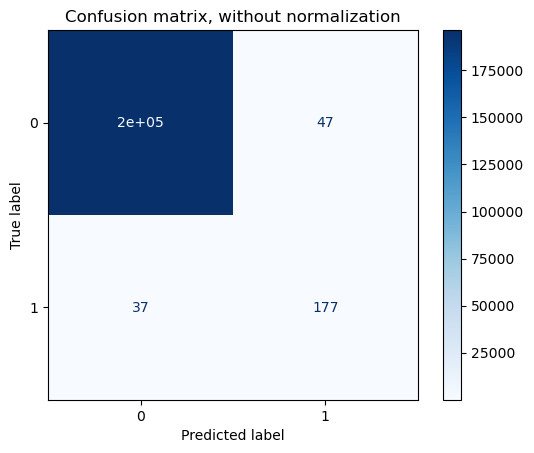

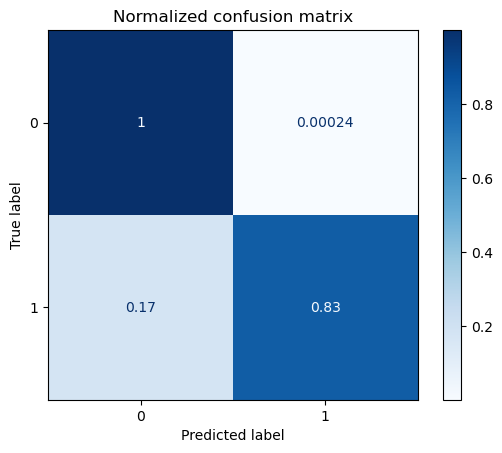

In [75]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

# Plot the confusion matrix

for title, normalize in titles_options:
    disp = plot_confusion_matrix(gradient_boosting_SMOTE, x_val, y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
# Display plot
plt.show()

La aplicación del SMOTE ha provocado la mejora del modelo de manera considerable. **Consigue acertar un 83% de los fraudes, frente al 79% que conseguía sin aplicar el SMOTE.**

#### 7.4.2 Métricas: Accuracy, Recall, Precision, F1 score con SMOTE

In [22]:
# Print the general metrics.

print (classification_report(y_val, predictions_SMOTE))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    196394
           1       0.79      0.83      0.81       214

    accuracy                           1.00    196608
   macro avg       0.89      0.91      0.90    196608
weighted avg       1.00      1.00      1.00    196608



Con el SMOTE se ha conseguido mejorar estas métricas. La precisión ha aumentado a un 79%, el recall a un 83% y por último el valor del F1-Score es de un 81%. 

In [24]:
# Print the F2 score.

print('F2 score is ' +str(fbeta_score(y_val, predictions_SMOTE, average='binary', beta=2)))

# Model Accuracy

print("Accuracy:",accuracy_score(y_val, predictions_SMOTE))

F2 score is 0.8194444444444444
Accuracy: 0.99957275390625


Tras haber realizado un SMOTE con el Gradient Boosting, se produce una mejora del modelo. **Hemos conseguido un F2 superior, pasando de un 77% a un 81.9%.**

#### 7.4.3. Curva ROC con SMOTE

Para evaluar nuestro modelo, la representaremos graficamente para deducir que tan bueno es el modelo.

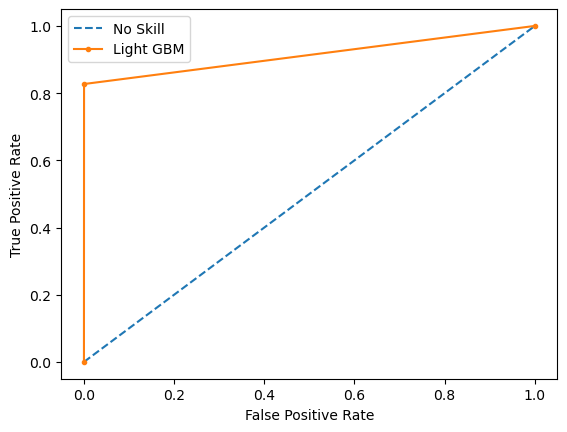

The Compute Area Under the Receiver Operating Characteristic is 0.913431744445816


In [25]:
# Keep probabilities for the positive outcome only
yhat = predict_probabilities[:, 1]
# Calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, predictions_SMOTE)
# Plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Light GBM')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# Show the plot
plt.show()

# Display the ROC AUC.

print('The Compute Area Under the Receiver Operating Characteristic is '+ str(roc_auc_score(y_val,predictions_SMOTE)))

El AUC ha mejorado también, por lo que concluimos que realizar el SMOTE le ha venido mejor a nuestro modelo.

[Ir arriba del documento](#top)